## Proyecto Final

### Punto 2

Referencias del texto: https://www.maths.ed.ac.uk/~ateckent/vacation_reports/Summer%20Project%20Final.pdf

In [34]:
#Lirerias importantes

import random
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm
from numpy import math
from matplotlib import pyplot as plt

In [3]:
#Vamos a generar el camino geometrico 
#Usando el modelo B-S




### Punto 3

#### GARCH

In [4]:
import random
import numpy as np
import scipy
import datetime
from scipy import stats
from scipy.stats import norm
from numpy import math
import yfinance as yf
import arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt

In [5]:
#we download the dataset of the price actions of META
start = datetime.datetime(2012, 10, 13)
end = datetime.datetime(2022, 10, 13)

ticker = yf.download('META', start = start, end = end, interval='1d')

[*********************100%***********************]  1 of 1 completed


We get the returns

<AxesSubplot: xlabel='Date'>

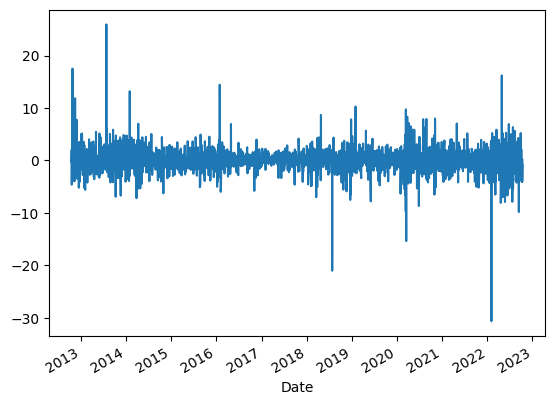

In [6]:
meta_rets = np.log(ticker['Adj Close']).diff().dropna()*100 #consecutive diff
meta_rets2 = meta_rets**2
meta_rets.plot()

We see the Autocorrelation

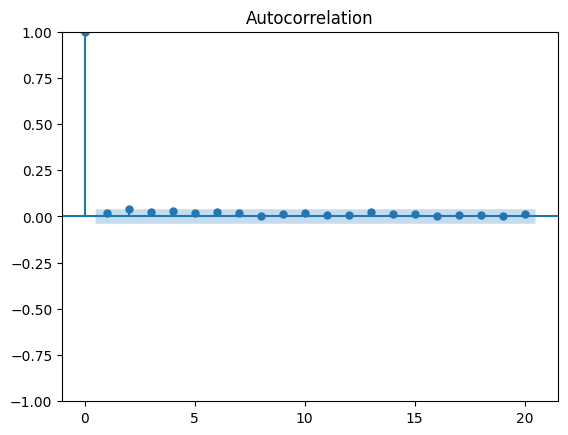

/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


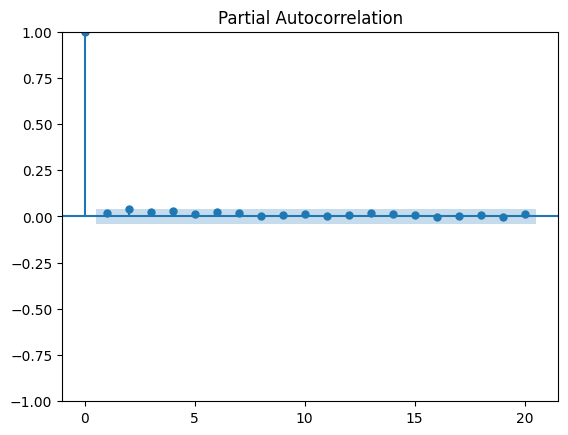

In [7]:
plot_acf(meta_rets2, lags = 20)
plt.show()
plot_pacf(meta_rets2, lags = 20)
plt.show()

In [8]:
from arch import arch_model
am = arch_model(meta_rets, p=1, o=0, q=1)
meta_model = am.fit()
print(meta_model.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15973.208039602083
Iteration:      2,   Func. Count:     17,   Neg. LLF: 819912158.3524007
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6118.966905238436
Iteration:      4,   Func. Count:     31,   Neg. LLF: 6196.648464948283
Iteration:      5,   Func. Count:     37,   Neg. LLF: 6532.743293832819
Iteration:      6,   Func. Count:     43,   Neg. LLF: 107117478927.32996
Iteration:      7,   Func. Count:     51,   Neg. LLF: 33415.63981143116
Iteration:      8,   Func. Count:     61,   Neg. LLF: 5619.7301356642665
Iteration:      9,   Func. Count:     67,   Neg. LLF: 5619.7667225974765
Iteration:     10,   Func. Count:     73,   Neg. LLF: 5617.301470599155
Iteration:     11,   Func. Count:     79,   Neg. LLF: 5627.651769956161
Iteration:     12,   Func. Count:     85,   Neg. LLF: 5594.8873567548035
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10349.984928232447
Iteration:     14,   Func. Count:     99,   Neg. LLF: 5596

To verify that the parameters are the correct ones, we can make this (Karasan, 2021):

In [9]:
bic_garch = []
for p in range(1, 5): 
    for q in range(1, 5):
        am = arch_model(meta_rets, mean='zero',vol='GARCH',p=p, o=0, q=q)
        meta_model = am.fit()
        bic_garch.append(meta_model.bic)
        if meta_model.bic == np.min(bic_garch):
            best_param = p, q
garch = aam = arch_model(meta_rets, mean='zero',vol='GARCH',p=best_param[0], o=0, q=best_param[1])

Iteration:      1,   Func. Count:      5,   Neg. LLF: 15969.679668133358
Iteration:      2,   Func. Count:     14,   Neg. LLF: 442322.91614104615
Iteration:      3,   Func. Count:     19,   Neg. LLF: 5620.0557669094305
Iteration:      4,   Func. Count:     24,   Neg. LLF: 5617.072501953748
Iteration:      5,   Func. Count:     29,   Neg. LLF: 6530.729670393246
Iteration:      6,   Func. Count:     34,   Neg. LLF: 6530.729670393246
Iteration:      7,   Func. Count:     39,   Neg. LLF: 1321259422.8796387
Iteration:      8,   Func. Count:     46,   Neg. LLF: 6310.447181212977
Iteration:      9,   Func. Count:     53,   Neg. LLF: 5620.319388482081
Iteration:     10,   Func. Count:     58,   Neg. LLF: 5620.072220402179
Iteration:     11,   Func. Count:     63,   Neg. LLF: 5603.327770079057
Iteration:     12,   Func. Count:     68,   Neg. LLF: 5600.332928542268
Iteration:     13,   Func. Count:     73,   Neg. LLF: 5597.203916381444
Iteration:     14,   Func. Count:     78,   Neg. LLF: 5595.9

#### VaR y ES

Let's get the data

In [20]:
alpha = 0.5
meta_price = yf.download('META', start = "2021-01-01", end = "2022-01-01")


[*********************100%***********************]  1 of 1 completed


We now get the logarithmic returns

<AxesSubplot: xlabel='Date'>

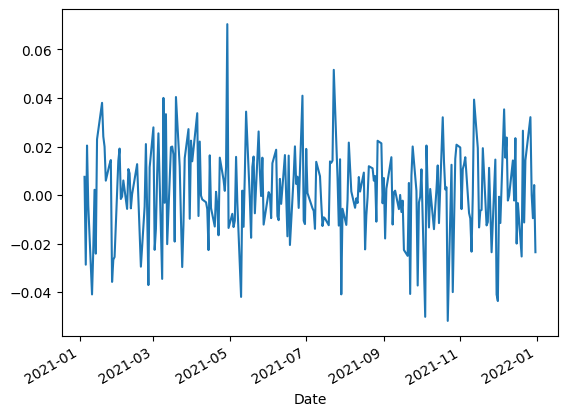

In [21]:
meta_rets = np.log(meta_price['Adj Close']).diff().dropna()
meta_rets.plot()

Then

In [31]:
ord_meta_rets = meta_rets.sort_values(ascending = False)

In [32]:
inv = 198900013
alpha = 0.05
num_values = meta_rets.count()
pos = num_values-int(alpha*num_values)
VaR = inv*ord_meta_rets[pos]
ES = inv*(ord_meta_rets[pos:].mean())
print("VaR =", VaR)
print("ES =", ES)

VaR = -7114180.7426822875
ES = -8307633.951392344


In [29]:
ord_mta_rets = meta_price["Losses"].sort_values(ascending = True)
display(meta_price)
print(ord_mta_rets)

,Open,High,Low,Close,Adj Close,Volume,Simulaciones,Losses
Date,,,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100,NaN,NaN
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600,1.007548,-67.918824
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100,0.971731,-63.531789
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800,1.020622,-74.546243
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300,0.995646,-67.315670
...,...,...,...,...,...,...,...,...
2021-12-27,338.850006,347.869995,338.010010,346.179993,346.179993,17795000,1.032633,-1.146239
2021-12-28,346.630005,352.709991,345.200012,346.220001,346.220001,16637600,1.000116,9.831123
2021-12-29,346.910004,349.690002,341.640015,342.940002,342.940002,10747000,0.990526,9.776489


Date
2021-01-15   -92.822290
2021-01-19   -88.283302
2021-01-13   -85.446769
2021-03-09   -84.350677
2021-01-14   -82.690216
                ...    
2021-09-01    43.332833
2021-08-31    44.161002
2021-09-02    44.890170
2021-09-08    45.277170
2021-01-04          NaN
Name: Losses, Length: 252, dtype: float64


In [30]:
i = 8000000
alpha = 0.05
val = ord_mta_rets.count()
pos = int(alpha*val)
VaR = i*ord_mta_rets[pos]
ES = i * (ord_mta_rets[pos:].mean())
print("VaR = ", VaR)
print("ES = ", ES)

VaR =  -616709930.4851427
ES =  -95555404.44170748


In [37]:
from scipy.stats import norm
sigmad = meta_price.std()
mud = meta_price.mean()
VaRm = inv*ord_mta_rets[pos]
ESm = inv*(mud+sigmad*((math.exp(0.5*norm.ppf(alpha)**2))/(math.sqrt(2*math.pi)*(1-alpha))))
print("Model VaR = ", -VaRm)
print("Model VaR = ", -ESm)

Model VaR =  -7455487796.055634
Model VaR =  Open           -7.507484e+10
High           -7.578105e+10
Low            -7.436403e+10
Close          -7.514092e+10
Adj Close      -7.514092e+10
Volume         -6.440699e+15
Simulaciones   -2.051317e+08
Losses         -8.254396e+09
dtype: float64
